# Week 02 Assignment glucose level data

Welcome to week two of this course programming 1. You will learn about time related data wrangling with pandas and you will learn to visualize with bokeh. This week will be focussed around missing data. Concretely, you will preprocess the glucose json file using interpolation to impute in order to conduct visual analysis. Learning outcomes:

- load a json dataset 
- typecast the Pandas DataFrame to appropiate data types
- inspect the dataset for quality and metadata information
- add a column with interpolated data in Pandas DataFrame
- perform visual analysis

The assignment consists of 6 parts:

- [part 1: load the data](#0)
     - [Exercise 1.1](#ex-11)
- [part 2: prepare for inspection](#1)
     - [Exercise 2.1](#ex-21)
- [part 3: inspect the data](#2)
     - [Exercise 3.1](#ex-31)
- [part 4: interpolate the data](#3)
     - [Exercise 4.1](#ex-41)
- [part 5: visualize the data](#4)
     - [Exercise 5.1](#ex-51)
- [part 6: Challenge](#5)
     - [Exercise 6.1](#ex-61)

Part 1 and 5 are mandatory, part 6 is optional (bonus)
To pass the assingnment you need to a score of 60%. 


<a name='0'></a>
## Part 1: Load the data

Instructions: Load the json datafile `glucose.json` into a pandas dataframe. Check your dataframe with a `.head()` to compare with the expected outcome

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>json.load() method reads a file, pd.read_json converts it to a Pandas DataFrame</li>
    <li>when loading into a Pandas DataFrame use records orientation </li>
</ul>
</details>

<a name='ex-11'></a>
### Code your solution

In [1]:
# CODE YOUR SOLUTION HERE
import json
import pandas as pd
import matplotlib.pyplot as plt

"""
glucose.json is a string representation of a json file, this means you have to load the data first using json.load().
json.load() is used to read the JSON document from a file. 
pd.read_json() will convert the JSON string into a DataFrame.
The format is specified as 'records' : list like [{column -> value}, ... , {column -> value}]
"""

file_path = '../data/glucose.json'
with open(file_path, 'r') as f:
    data = json.load(f)
    
df = pd.read_json(data, orient='record')
df.head()

,ID,time,recordtype,glucose
0,2845.0,2019-04-25 00:08,1,109
1,2850.0,2019-04-25 00:50,1,
2,2877.0,2019-04-25 07:02,1,123
3,2881.0,2019-04-25 07:34,1,158
4,2886.0,2019-04-25 08:19,1,


#### Expected outcome: 

<a name='1'></a>
## Part 2: Prepare the data

Check the datatypes of your dataframe. The `glucose` field should be an integer, the `time` field should have a datetime format. If the datatypes are different you should typecast them to the right format.
Make sure that your dataset is sorted by the time column


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>use astype() method or pandas.DataFrame.to_datetime() for instance</li>
    <li>make sure that the empty spaces are filled with NaN. Use errors='coerce'</li>
    <li>set_index(), sort_index() and reset_index() are helpful to sort on index</li>
</ul>
</details>

<a name='ex-21'></a>
### Code your solution

In [2]:
# define types and make sure errors are coerced. 
# Thus, invalid parsing will be set as NaN.
types = {
    'ID':'int64',
    'recordtype':'int64'
}
df = df.astype(types)
df['time'] = pd.to_datetime(df['time'])
df['glucose'] = pd.to_numeric(df['glucose'], errors='coerce')

# It is not clear what the index is. The data as 136 rows, 
# but there are only 55 unique ID's and 134 unique time stamps.
# Anyway, I'll use time as the index as it makes more sense.
df = df.set_index(df['time']).sort_index()

In [3]:
df.dtypes

ID                     int64
time          datetime64[ns]
recordtype             int64
glucose              float64
dtype: object

#### Expected outcome: 

<a name='2'></a>
## Part 3: Inspect the data

Now that we prepared the data we are going to inspect the data to get more familiar with the data. You are required to do the following

- inspect the percentage missing data for glucose
- what is the relationship between recordtype and glucose value?
- what is the relationship between ID and glucose value?

Code the solutions to your answers. Create meaningful overviews or statistics

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>In the week 01 assignment some functions were explained to inspect missing values</li>
    <li>In the week 01 assignment some functions were explained to groupby value</li>
</ul>
</details>

<a name='ex-31'></a>
### Code your solution

In [4]:
nan_glucose = df['glucose'].isna().sum() / df.shape[0]
print('{:.2f}% of the glucose values are missing.'.format(nan_glucose * 100))

61.76% of the glucose values are missing.


There are 2 different types, namely: [1 0]


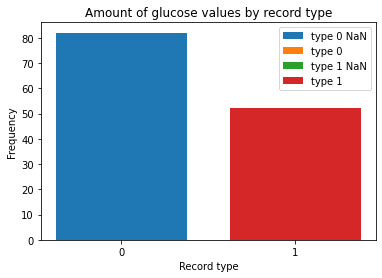

In [5]:
"""
To find the relationship between record type and glucose value,
I start with finding all recordtype types. 
Then, I will compare the glucose values of the different recordtype types with each other.
"""

types = df['recordtype'].unique()
print('There are {} different types, namely: {}'.format(len(types), types))


# visual inspection of the recordtypes and corresponding glucose values
# from a first inspection, it appears that type 0 has no glucose value at all,
# whereas type 1 does have glucose values.

type_0 = df[df['recordtype'] == 0]['glucose']
type_1 = df[df['recordtype'] == 1]['glucose']

type_0_isna = type_0.isna().sum()
type_0_notna = type_0.notna().sum()
type_1_isna = type_1.isna().sum()
type_1_notna = type_1.notna().sum()

# plot x axis 0 and 1
# plot y axis isna/notna
labels = ['0', '1']

fig, ax = plt.subplots()
width = 0.75

ax.bar('0', type_0_isna, width, label='type 0 NaN')
ax.bar('0', type_0_notna, width, label='type 0')
ax.bar('1', type_1_isna, width, label='type 1 NaN')
ax.bar('1', type_1_notna, width, label='type 1')

ax.set_ylabel('Frequency')
ax.set_xlabel('Record type')
ax.set_title('Amount of glucose values by record type')
ax.legend()

plt.show()

In [6]:
# to make sure the hypothesis is correct that type 0 does not contain any glucose values,
# I inspect type 0 in more detail.
type_0 = df[df['recordtype'] == 0]['glucose']
type_1 = df[df['recordtype'] == 1]['glucose']
print('Record type 0 contains {} values and {} NaN values.'.format(len(type_0), type_0.isna().sum()))
print('Record type 1 contains {} values and {} NaN values.'.format(len(type_1), type_1.isna().sum()))


# The hypothesis that record type 0 does not contain glucose values seems correct,
# as all 82 values are NaN values.

# This means there is a relationship between record type and glucose value.
# Type 0 -> no glucose values.
# Type 1 -> mostly glucose values.

Record type 0 contains 82 values and 82 NaN values.
Record type 1 contains 54 values and 2 NaN values.


In [39]:
""" To find the relationship between ID and the glucose value,
I'll redo the steps above.
"""
ids = df['ID'].unique()
print('There are {} different IDs out of {} rows'.format(len(ids), df.shape[0]))

# df[['ID', 'glucose']].sort_values('ID')
print('The unique values: ')
print(df['ID'].unique())

# as can be seen, there is one value that seems to be an invalid ID.
to_exclude = -9223372036854775808

# inspecting the table excluding the invalid ID we can conclude that 
# the invalid ID matches type 0.
print(df.loc[df['ID'] == to_exclude]['recordtype'].sum())
df.loc[df['ID'] != to_exclude]

# Thus, the relation between ID is found. Every record type 1 element is attached to a positive ID number. 
# This positive ID number will be linked to glucose value measurements.
# The negative ID will be linked to record type 0 and will have no glucose value.
# This means there is a direct relationship between ID and record type, and an indirect relationship between ID and glucose value.

There are 55 different IDs out of 136 rows
The unique values: 
[                2845 -9223372036854775808                 2850
                 2877                 2881                 2886
                 2899                 2909                 2916
                 2922                 2925                 2927
                 2929                 2932                 2935
                 2937                 2940                 2942
                 2944                 2947                 2949
                 2951                 2954                 2957
                 2960                 2969                 2971
                 2974                 2976                 2979
                 2981                 2983                 2985
                 2987                 2990                 2992
                 2994                 2996                 2999
                 3001                 3003                 3005
                 3008                 301

,ID,time,recordtype,glucose
time,,,,
2019-04-25 00:08:00,2845,2019-04-25 00:08:00,1,109.0
2019-04-25 00:50:00,2850,2019-04-25 00:50:00,1,NaN
2019-04-25 07:02:00,2877,2019-04-25 07:02:00,1,123.0
2019-04-25 07:34:00,2881,2019-04-25 07:34:00,1,158.0
2019-04-25 08:19:00,2886,2019-04-25 08:19:00,1,NaN
2019-04-25 11:01:00,2899,2019-04-25 11:01:00,1,139.0
2019-04-25 13:14:00,2909,2019-04-25 13:14:00,1,151.0
2019-04-25 14:17:00,2916,2019-04-25 14:17:00,1,129.0
2019-04-25 14:45:00,2922,2019-04-25 14:45:00,1,161.0


#### Expected outcome percentage missing data
0.6176470588235294

<a name='3'></a>
## Part 4: Interpolate the data

A lot of data is missing. Use interpolation to fill the missing values. Create a new column with the interpolated data. Take an argumentative approach. Select an interpolation method that suits the nature of the data and explain your choice. Mind you that the expected outcome of the interpolation values can differ from the example below

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>use Pandas.DataFrame.interpolate() method</li>
</ul>
</details>

<a name='ex-41'></a>
### Code your solution

In [97]:
# linearly interpolate the data. Assume record type 0 measurements
# are valid measurements. It treats every value equally spaced. 
# I'm not using the time method because it usually only works on daily 
# and higher resolution data.
df['interpolated'] = df['glucose'].interpolate('linear')
df

,ID,time,recordtype,glucose,interpolated
time,,,,,
2019-04-25 00:08:00,2845,2019-04-25 00:08:00,1,109.0,109.000000
2019-04-25 00:14:00,-9223372036854775808,2019-04-25 00:14:00,0,NaN,109.466667
2019-04-25 00:29:00,-9223372036854775808,2019-04-25 00:29:00,0,NaN,109.933333
2019-04-25 00:44:00,-9223372036854775808,2019-04-25 00:44:00,0,NaN,110.400000
2019-04-25 00:50:00,2850,2019-04-25 00:50:00,1,NaN,110.866667
...,...,...,...,...,...
2019-04-25 23:02:00,-9223372036854775808,2019-04-25 23:02:00,0,NaN,107.666667
2019-04-25 23:18:00,-9223372036854775808,2019-04-25 23:18:00,0,NaN,109.333333
2019-04-25 23:31:00,3062,2019-04-25 23:31:00,1,111.0,111.000000


#### Example outcome

<a name='4'></a>
## Part 5: Plot the data

Create a plot with the original data and the interpolated data. Consider what the best representation is for visualisation of actual values and modelled/imputed values. An example of such a plot is given below. This plot however is not considered the best practice. 

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>figure(x_axis_type='datetime') automatically makes nices labels of the datetime data</li>
</ul>
</details>

<a name='ex-51'></a>
### Code your solution

In [77]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.io import output_notebook
from bokeh.models import Legend

import numpy as np
output_notebook()

Loading BokehJS ...

In [98]:
# glucose values over time

# interpolated
p = figure(width=500, height=400, x_axis_type='datetime')
p.line(df['time'], df['interpolated'], color='navy', line_width=2, legend_label='Interpolated glucose value')
p.legend.location = 'top_left'

show(p)

In [99]:
# glucose over time
# Many values are missing.
p = figure(width=500, height=400, x_axis_type='datetime')
p.line(df['time'], df['glucose'], color='navy', line_width=2, legend_label='Glucose value')
p.legend.location = 'top_left'

show(p)

In [100]:
# interpolated and glucose values over time

# interpolated
p = figure(width=500, height=400, x_axis_type='datetime')
p.line(df['time'], df['interpolated'], color='navy', line_width=1, alpha=0.5, legend_label='Interpolated glucose value')
p.line(df['time'], df['glucose'], color='red', line_width=1, legend_label='Glucose value')

p.legend.location = 'top_left'

show(p)

<a name='6'></a>
## Part 6: Challenge

It might even be interesting to introduce a widget in which you can select different methods to interpolate.
1. Can you improve the interpolation by choosing an other method?
2. Can you add an rolling mean line? 
2. Can you improve the plot by making it interactive?

<a name='ex-61'></a>
### Code your solution

In [93]:
# interpolation method can be improved by using bbfill and rfill I suppose.
# Then we can add a rolling mean.
# Why use bfill and rfill? Because it's a time series data and we don't know all missing values.
# The best estimate will be to fill them with the same data. 
# Then we can use the rolling mean with a specified window to interpolate other values.

# code here ...

In [102]:
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, CustomJS, Slider
from bokeh.plotting import figure, show 